In [1]:
!wget https://www.spataru.at/students/course_files/week4/loan.csv

--2022-11-21 10:59:08--  https://www.spataru.at/students/course_files/week4/loan.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0.1s    

2022-11-21 10:59:09 (307 KB/s) - ‘loan.csv’ saved [38013/38013]



In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("loan.csv")

# EDA

In [5]:
df.shape

(614, 13)

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.Loan_Status.value_counts()[0]/df.shape[0]

0.6872964169381107

In [8]:
px.bar(data_frame=df, x="Loan_Status")

In [9]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Loan_Status")

In [10]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Education")

In [11]:
df.Gender.isna().sum()

13

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

In [14]:
impute = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [15]:
df[categorical_features] = impute.fit_transform(df[categorical_features])

In [16]:
df.Gender.isna().sum()

0

In [17]:
df[["LoanAmount"]]

,LoanAmount
0,NaN
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [18]:
df["LoanAmount"] = impute.fit_transform(df[["LoanAmount"]])

In [19]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
df = df.drop("Loan_ID", axis=1)

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df["Gender"] = df["Gender"].astype("category")

In [23]:
for col in categorical_features:
  df[col] = df[col].astype("category")

# Split Input and Output

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,120.0,360.0,1,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1


In [26]:
df["Loan_Amount_Term"] = impute.fit_transform(df[["Loan_Amount_Term"]])

In [27]:
X = df[df.columns[:-1]]

In [28]:
y = df[[df.columns[-1]]]

# Decision Tree

In [36]:
model = DecisionTreeClassifier(max_depth=2)

In [37]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [40]:
X[X.columns[11]]

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Credit_History_1.0, Length: 614, dtype: uint8

[Text(0.5, 0.8333333333333334, 'X[11] <= 0.5\ngini = 0.43\nsamples = 614\nvalue = [192, 422]'),
 Text(0.25, 0.5, 'X[2] <= 547.5\ngini = 0.145\nsamples = 89\nvalue = [82, 7]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[1] <= 9650.5\ngini = 0.331\nsamples = 525\nvalue = [110, 415]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.325\nsamples = 520\nvalue = [106, 414]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]')]

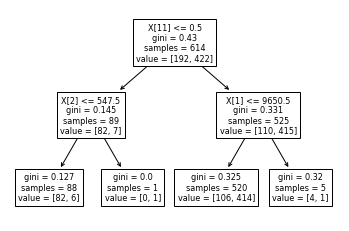

In [38]:
tree.plot_tree(model)

In [39]:
model.score(X,y)

0.8159609120521173

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

# Evaluation

In [41]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [43]:
y_pred = model.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.7980295566502463

In [45]:
precision_score(y_test, y_pred)

0.7678571428571429

In [46]:
recall_score(y_test, y_pred)

0.9847328244274809

In [47]:
f1_score(y_test,y_pred)

0.8628762541806019

# K-Folds Cross Validation

In [59]:
model = DecisionTreeClassifier(random_state=42)

In [60]:
cross_validate(model, X, y, scoring=["f1", "precision", "recall"])

{'fit_time': array([0.00711679, 0.00530696, 0.00539303, 0.00792027, 0.00548363]),
 'score_time': array([0.00426197, 0.00459647, 0.00478196, 0.0045166 , 0.00417781]),
 'test_f1': array([0.78106509, 0.76243094, 0.76923077, 0.78980892, 0.7721519 ]),
 'test_precision': array([0.78571429, 0.71875   , 0.76470588, 0.84931507, 0.82432432]),
 'test_recall': array([0.77647059, 0.81176471, 0.77380952, 0.73809524, 0.72619048])}

In [78]:
model = KNeighborsClassifier(n_neighbors=9)

In [79]:
scaler = StandardScaler()

In [80]:
X_scaled = scaler.fit_transform(X)

In [81]:
cross_validate(model, X_scaled, y["Loan_Status_Y"], scoring=["f1", "precision", "recall"])

{'fit_time': array([0.00262833, 0.00141478, 0.00138688, 0.00133848, 0.00151753]),
 'score_time': array([0.01002765, 0.00820661, 0.00796604, 0.00797057, 0.0080626 ]),
 'test_f1': array([0.86010363, 0.84974093, 0.84974093, 0.87234043, 0.85714286]),
 'test_precision': array([0.76851852, 0.75925926, 0.75229358, 0.78846154, 0.77142857]),
 'test_recall': array([0.97647059, 0.96470588, 0.97619048, 0.97619048, 0.96428571])}

In [68]:
cross_validate(model, X_scaled, y["Loan_Status_Y"], scoring=["f1", "precision", "recall"])

,Loan_Status_Y
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [82]:
model = GaussianNB()

In [83]:
cross_validate(model, X_scaled, y["Loan_Status_Y"], scoring=["f1", "precision", "recall"])

{'fit_time': array([0.00331259, 0.00192451, 0.00191474, 0.00192475, 0.0019455 ]),
 'score_time': array([0.00562048, 0.00481558, 0.00494623, 0.00483322, 0.00498009]),
 'test_f1': array([0.86631016, 0.8342246 , 0.84656085, 0.87777778, 0.86813187]),
 'test_precision': array([0.79411765, 0.76470588, 0.76190476, 0.82291667, 0.80612245]),
 'test_recall': array([0.95294118, 0.91764706, 0.95238095, 0.94047619, 0.94047619])}

In [132]:
model = RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=100, random_state=42)

In [133]:
results = cross_validate(model, X_scaled, y["Loan_Status_Y"], scoring=["f1", "precision", "recall"])
results["test_f1"].mean()

0.8766952317357394